<h1>1. Business Problem </h1>

<h2> 1.1 Problem Description </h2>

<p>
Netflix is all about connecting people to the movies they love. To help customers find those movies, they developed world-class movie recommendation system: CinematchSM. Its job is to predict whether someone will enjoy a movie based on how much they liked or disliked other movies. Netflix use those predictions to make personal movie recommendations based on each customer’s unique tastes. And while <b>Cinematch</b> is doing pretty well, it can always be made better.
</p>
<p>Now there are a lot of interesting alternative approaches to how Cinematch works that netflix haven’t tried. Some are described in the literature, some aren’t. We’re curious whether any of these can beat Cinematch by making better predictions. Because, frankly, if there is a much better approach it could make a big difference to our customers and our business.</p>
<p> Credits: https://www.netflixprize.com/rules.html </p>

<h2> 1.2 Problem Statement </h2>

<p>
Netflix provided a lot of anonymous rating data, and a prediction accuracy bar that is 10% better than what Cinematch can do on the same training data set. (Accuracy is a measurement of how closely predicted ratings of movies match subsequent actual ratings.) 
</p>

<h2> 1.3 Sources </h2>

<ul>
<li> https://www.netflixprize.com/rules.html</li>
<li> https://www.kaggle.com/netflix-inc/netflix-prize-data</li>
<li> Netflix blog: https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429 (very nice blog)</li>
<li>surprise library: http://surpriselib.com/ (we use many models from this library)</li>
<li>surprise library doc: http://surprise.readthedocs.io/en/stable/getting_started.html (we use many models from this library)</li>
<li>installing surprise: https://github.com/NicolasHug/Surprise#installation </li>
<li> Research paper: http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf (most of our work was inspired by this paper)</li>
<li> SVD Decomposition : https://www.youtube.com/watch?v=P5mlg91as1c </li>
</ul>

<h2>1.4 Real world/Business Objectives and constraints  </h2>

Objectives:
1. Predict the rating that a user would give to a movie that he ahs not yet rated.
2. Minimize the difference between predicted and actual rating (RMSE and MAPE)
<br>

Constraints:
1. Some form of interpretability.

<h1> 2. Machine Learning Problem </h1>

<h2>2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> Get the data from : https://www.kaggle.com/netflix-inc/netflix-prize-data/data </p>
<p> Data files : 
<ul> 
<li> combined_data_1.txt </li>
<li> combined_data_2.txt </li>
<li> combined_data_3.txt </li>
<li> combined_data_4.txt </li>
<li> movie_titles.csv </li>
</ul>
<pre>  
The first line of each file [combined_data_1.txt, combined_data_2.txt, combined_data_3.txt, combined_data_4.txt] contains the movie id followed by a colon. Each subsequent line in the file corresponds to a rating from a customer and its date in the following format:

CustomerID,Rating,Date

MovieIDs range from 1 to 17770 sequentially.
CustomerIDs range from 1 to 2649429, with gaps. There are 480189 users.
Ratings are on a five star (integral) scale from 1 to 5.
Dates have the format YYYY-MM-DD.
</pre>

<h3> 2.1.2 Example Data point </h3>

<pre>
1:
1488844,3,2005-09-06
822109,5,2005-05-13
885013,4,2005-10-19
30878,4,2005-12-26
823519,3,2004-05-03
893988,3,2005-11-17
124105,4,2004-08-05
1248029,3,2004-04-22
1842128,4,2004-05-09
2238063,3,2005-05-11
1503895,4,2005-05-19
2207774,5,2005-06-06
2590061,3,2004-08-12
2442,3,2004-04-14
543865,4,2004-05-28
1209119,4,2004-03-23
804919,4,2004-06-10
1086807,3,2004-12-28
1711859,4,2005-05-08
372233,5,2005-11-23
1080361,3,2005-03-28
1245640,3,2005-12-19
558634,4,2004-12-14
2165002,4,2004-04-06
1181550,3,2004-02-01
1227322,4,2004-02-06
427928,4,2004-02-26
814701,5,2005-09-29
808731,4,2005-10-31
662870,5,2005-08-24
337541,5,2005-03-23
786312,3,2004-11-16
1133214,4,2004-03-07
1537427,4,2004-03-29
1209954,5,2005-05-09
2381599,3,2005-09-12
525356,2,2004-07-11
1910569,4,2004-04-12
2263586,4,2004-08-20
2421815,2,2004-02-26
1009622,1,2005-01-19
1481961,2,2005-05-24
401047,4,2005-06-03
2179073,3,2004-08-29
1434636,3,2004-05-01
93986,5,2005-10-06
1308744,5,2005-10-29
2647871,4,2005-12-30
1905581,5,2005-08-16
2508819,3,2004-05-18
1578279,1,2005-05-19
1159695,4,2005-02-15
2588432,3,2005-03-31
2423091,3,2005-09-12
470232,4,2004-04-08
2148699,2,2004-06-05
1342007,3,2004-07-16
466135,4,2004-07-13
2472440,3,2005-08-13
1283744,3,2004-04-17
1927580,4,2004-11-08
716874,5,2005-05-06
4326,4,2005-10-29
</pre>

<h2>2.2 Mapping the real world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<pre>
For a given movie and user we need to predict the rating would be given by him/her to the movie. 
The given problem is a Recommendation problem 
It can also seen as a Regression problem 
</pre>

<h3> 2.2.2 Performance metric </h3>

<ul>
<li> Mean Absolute Percentage Error: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error </li>
<li> Root Mean Square Error: https://en.wikipedia.org/wiki/Root-mean-square_deviation </li>
</ul>


<h3> 2.2.3 Machine Learning Objective and Constraints </h3>

1. Minimize RMSE.
2. Try to provide some interpretability.

In [112]:
# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime
import pandas as pd
import numpy as np
import random

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

import os
from scipy import sparse
from scipy.sparse import csr_matrix
import pickle

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.model_selection import train_test_split

# Configs

In [2]:
base_dir = '/media/amd_3/20DAD539DAD50BC2/DSET_REPO/DataSets/CS05_NETFLIX_MOVIE_RECOMMEND'
# set path for the structured cleaned data csv file
df_path = './data/movie_data.csv'

df_size = -1 # set -1 if you wnt to consider the entire size

# sample the dataset by selecting subset of users, movies randomly
num_users = 25000
num_movies = 3000

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Preprocessing</h2> 

<h3>3.1.1 Converting / Merging whole data to required format: u_i, m_j, r_ij</h3>

In [3]:
def get_dataframe(base_dir):
    
    if os.path.isfile('./data/movie_data.csv'):
        print('File already exists in the path')
        return

        
    start = datetime.now()
    
    # list of file names
    file_name_list = ['combined_data_1.txt','combined_data_2.txt', 
                      'combined_data_3.txt', 'combined_data_4.txt']
    
    # a csv file for structured data
    data = open('./data/movie_data.csv', mode='w')
    
    # process file by file
    for fname in file_name_list:
        print('Reading data from file: ', fname)
        
        # form absolute path of file
        abs_path = os.path.join(base_dir, fname)
        
        # open file and extract required fields
        with open(abs_path) as f:
            
            # process a single file
            for line in f:
                
                # strip the whitespaces
                line = line.strip()
                
                if ',' in line:
                    row = [x for x in line.split(',')]
                    data.write(','.join([movie_id] + row))
                    data.write('\n')
                elif ':' in line:
                    movie_id = line.replace(':', '')
                else:
                    print('Invalid line found !!!')
    
    # close the file
    data.close()
    print('Time taken :', datetime.now() - start)

In [4]:
get_dataframe(base_dir)

File already exists in the path


In [5]:
def dedupe_dataframe(df_path):
    
    if os.path.exists('./data/deduped_movie_data.csv'):
        df = pd.read_csv('./data/deduped_movie_data.csv', 
                         names=['movie', 'user','rating','date'],
                         delimiter=',')
        return df

    print("creating the dataframe from data.csv file..")
    df = pd.read_csv(df_path,  names=['movie', 'user','rating','date'],
                     delimiter=',')
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

    # we are arranging the ratings according to time.
    print(datetime.now(),  ' Sorting the dataframe by date..')
    df = df.sort_values(by='date')
    print(datetime.now(),  ' Sorting of data frame completed')
         
    # dedupe the data frames
    print(datetime.now(), ' Removing duplicates ...')
    df = df.drop_duplicates(subset=['movie','user','rating', 'date'], 
                            keep='last')
    print(datetime.now(), ' Duplicates removed  ...')

    print("Total data ")
    print("-"*50)
    print("\nTotal no of ratings :",df.shape[0])
    print("Total No of Users   :", len(np.unique(df.user)))
    print("Total No of movies  :", len(np.unique(df.movie)))
    
    df.to_csv('./data/deduped_movie_data.csv', index=False)
    
    return df

In [6]:
df = dedupe_dataframe(df_path)

# just for the test purpose
if df_size > 0:
    print('Dataset size will be set to a limit of ', df_size)
    df = df.tail(n=df_size)

/home/amd_3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


 ##  3.1 Basic Statistics of the Data

In [7]:
print('Total data')
print("-"*50)
print('\nTotal no of ratings :', df.shape[0])
print('Total No of Users   :', len(set(df['user'])))
print('Total No of movies  :', len(set(df['movie'])))

Total data
--------------------------------------------------

Total no of ratings : 100480508
Total No of Users   : 481961
Total No of movies  : 20273


In [8]:
# method to make y-axis more readable
def human(num, units = 'M'):
    
    units = units.lower()
    num = float(num)
    
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

In [9]:
def basic_analysis(df, prefix_name):
    
    # set start time
    start = datetime.now()
    
    print('-'*50)
    print(prefix_name + ' Total no of ratings :', df.shape[0])
    print(prefix_name + ' Total No of Users   :', len(set(df['user'])))
    print(prefix_name + ' Total No of movies  : ', len(set(df['movie'])))
    
    # add day of week
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df['day_of_week'] = df.date.dt.weekday_name 
          
    # 1. Distribution of ratings
    plt.title(prefix_name + ' - Distribution of ratings', fontsize=15)
    sns.countplot(df.rating)
    plt.ylabel('Count')
    plt.xlabel('Rating')
    plt.show()
    plt.close()
          
    # 2. Number of ratings per Month
    ax = df.resample('m', on='date')['rating'].count().plot()
    ax.set_title(prefix_name + ' No of ratings per month')
    plt.xlabel('Month')
    plt.ylabel('No of ratings(per month)')
    ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
    plt.show()
    plt.close()
          
    # 3. Analysis on the Ratings given by user 
    no_of_rated_movies_per_user = df.groupby(by='user')['rating'].count().sort_values(ascending=False)
          
    fig = plt.figure(figsize=plt.figaspect(.5))
    ax1 = plt.subplot(121)
    sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
    plt.xlabel('No of ratings by user')
    plt.title(prefix_name + '- PDF')
    ax2 = plt.subplot(122)
    sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
    plt.xlabel('No of ratings by user')
    plt.title(prefix_name + ' CDF')
    plt.show()
    plt.close()
          
    print(prefix_name + ' Describe information :\n' \
          + str(no_of_rated_movies_per_user.describe()))
          
    # Qunatile analysis   
    quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), 
                                                     interpolation='higher')
    plt.title(prefix_name + ' Quantiles and their Values')
    quantiles.plot()
    # quantiles with 0.05 difference
    plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', 
                label='quantiles with 0.05 intervals')
    # quantiles with 0.25 difference
    plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', 
                label = 'quantiles with 0.25 intervals')
    plt.ylabel('No of ratings by user')
    plt.xlabel('Value at the quantile')
    plt.legend(loc='best')

    # annotate the 25th, 50th, 75th and 100th percentile values....
    for x,y in zip(quantiles.index[::25], quantiles[::25]):
        plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)
                    ,fontweight='bold')
    plt.show()
    plt.close()
       
       
    no_of_ratings_per_movie = df.groupby(by='movie')['rating'].count().sort_values(ascending=False)

    fig = plt.figure(figsize=plt.figaspect(.5))
    ax = plt.gca()
    plt.plot(no_of_ratings_per_movie.values)
    plt.title(prefix_name + ' - # RATINGS per Movie')
    plt.xlabel('Movie')
    plt.ylabel('No of Users who rated a movie')
    ax.set_xticklabels([])
    plt.show()
    plt.close()
          
          
    fig, ax = plt.subplots()
    sns.countplot(x='day_of_week', data=df, ax=ax)
    plt.title(prefix_name + ' No of ratings on each day...')
    plt.ylabel('Total no of ratings')
    plt.xlabel('Day')
    ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
    plt.show()
    plt.close()
          
    fig = plt.figure(figsize=plt.figaspect(.45))
    sns.boxplot(y='rating', x='day_of_week', data=df)
    plt.show()
    plt.close()
    
    print('Total time for plot : ', datetime.now() - start)
    
    # add day of week column
    print(prefix_name + ' - Average ratings per week day')     
    avg_week_df = df.groupby(by=['day_of_week'])['rating'].mean()
    print(" AVerage ratings")
    print("-"*30)
    print(avg_week_df)
    print('\n')

# Sample the data

In [10]:
def sample_the_data_frame(df, num_users, num_movies):
    
    if os.path.exists('./data/Sampled_Deduped_Data.csv'):
        df = pd.read_csv('./data/Sampled_Deduped_Data.csv', index_col=False)
        return df
        
    
    # get unique movies & users from the data frame
    users_set = set(df['user'].tolist())
    movies_set = set(df['movie'].tolist())
    
    # sample desired number of users & movies from the data frame
    selected_users = list(set(random.sample(users_set, num_users)))
    selected_movies = list(set(random.sample(movies_set, num_movies)))
    
    print('Number of sampled users:%d, number of sample movies:%d'%(len(selected_users),
                                                                    len(selected_movies),))
    
    # 1. select based on users
    #df_or = df[(df['user'].isin(selected_users)) | (df['movie'].isin(selected_movies))]
    df_and = df[(df['user'].isin(selected_users)) & (df['movie'].isin(selected_movies))]
    
    df_and = df_and.sort_values(['date'], ascending=True)
    
    # write sampled data to disk
    df_and.to_csv('./data/Sampled_Deduped_Data.csv', index=False)
    
    # 
    return df_and  

In [11]:
df = sample_the_data_frame(df, num_users, num_movies)

<h2>3.2 Spliting data into Train and Test(80:20) </h2>

In [12]:
if os.path.exists('./data/DF_train.csv') and os.path.exists('./data/DF_test.csv'):
    print('Train , Test files already exists !!!')
    df_train = pd.read_csv('./data/DF_train.csv', index_col=False)
    df_test = pd.read_csv('./data/DF_test.csv', index_col=False)
else:
    df_train, df_test = train_test_split(df, test_size=0.20, shuffle=False)
    df_train.to_csv('./data/DF_train.csv', index=False)
    df_test.to_csv('./data/DF_test.csv', index=False)

<h3>3.2.1 Basic Statistics in Train data (#Ratings, #Users, and #Movies)</h3>

--------------------------------------------------
Train Data Total no of ratings : 696736
Train Data Total No of Users   : 20515
Train Data Total No of movies  :  2726


/home/amd_3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/amd_3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


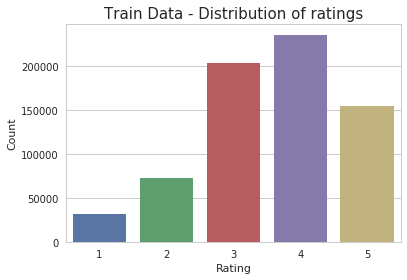

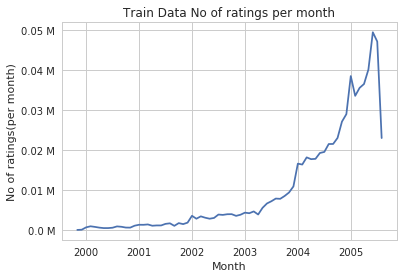

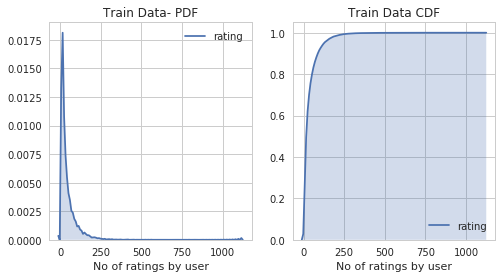

Train Data Describe information :
count    20515.000000
mean        33.962272
std         48.224927
min          1.000000
25%          6.000000
50%         16.000000
75%         42.000000
max       1112.000000
Name: rating, dtype: float64


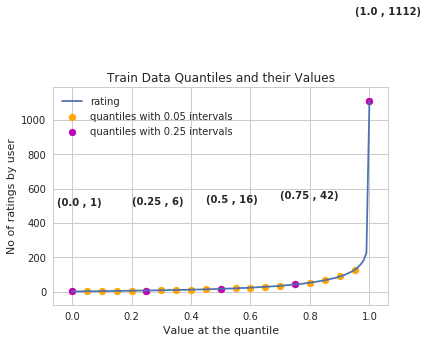

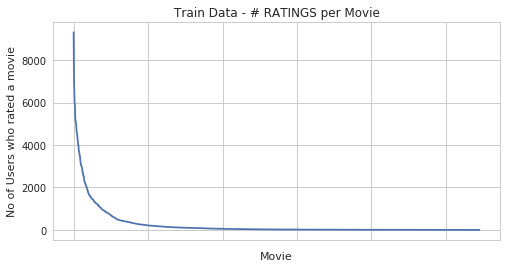

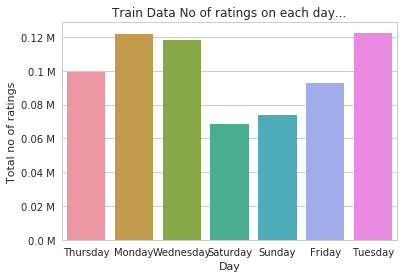

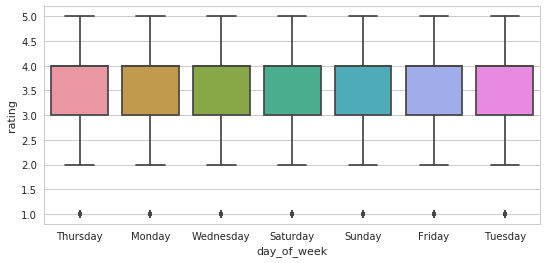

Total time for plot :  0:00:38.845502
Train Data - Average ratings per week day
 AVerage ratings
------------------------------
day_of_week
Friday       3.581220
Monday       3.580953
Saturday     3.609983
Sunday       3.592532
Thursday     3.589330
Tuesday      3.568810
Wednesday    3.592213
Name: rating, dtype: float64




In [13]:
basic_analysis(df_train, 'Train Data')

<h3>3.2.2 Basic Statistics in Test data (#Ratings, #Users, and #Movies)</h3>

--------------------------------------------------
Test Data Total no of ratings : 174185
Test Data Total No of Users   : 14910
Test Data Total No of movies  :  2348


/home/amd_3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/amd_3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


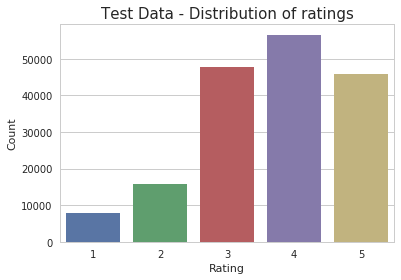

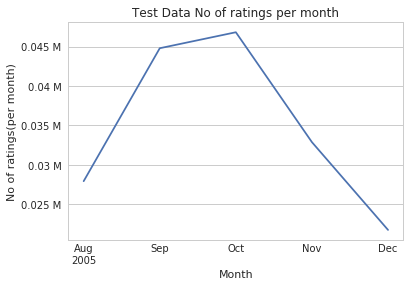

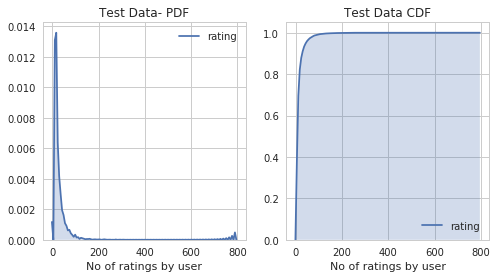

Test Data Describe information :
count    14910.000000
mean        11.682428
std         19.556655
min          1.000000
25%          3.000000
50%          6.000000
75%         12.000000
max        793.000000
Name: rating, dtype: float64


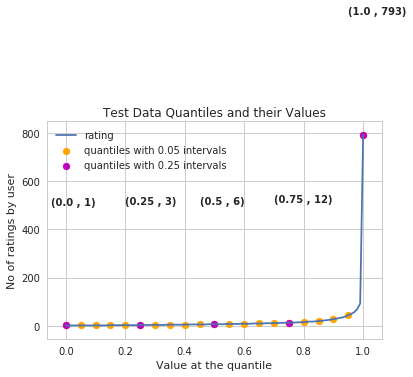

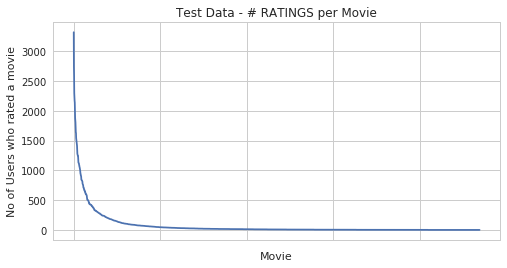

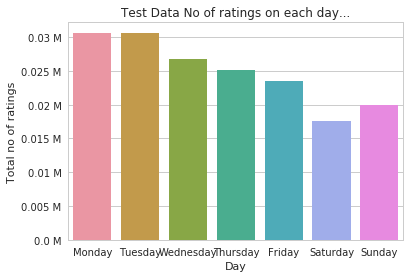

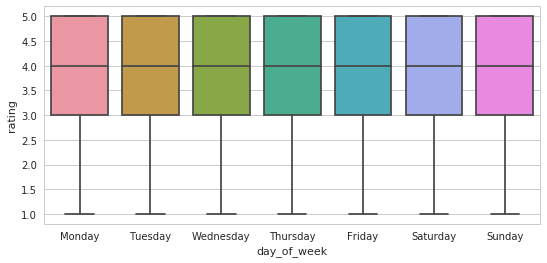

Total time for plot :  0:00:02.146961
Test Data - Average ratings per week day
 AVerage ratings
------------------------------
day_of_week
Friday       3.640968
Monday       3.665373
Saturday     3.689816
Sunday       3.682455
Thursday     3.674987
Tuesday      3.655318
Wednesday    3.678616
Name: rating, dtype: float64




In [14]:
basic_analysis(df_test, 'Test Data')

<h1> 3.3.8 Cold Start problem </h1>

<h4> 3.3.8.1 Cold Start problem with Users</h4>

In [15]:
users_set_test = set(df_test['user'])
new_users = users_set_test - set(df_train['user'])
print('Number of unique users in the test dataset :', len(users_set_test))
print('Number of new users (users present only in test data) : ', len(new_users))
print('Percentage of new users : ', (len(new_users) * 100.0)/len(users_set_test))

Number of unique users in the test dataset : 14910
Number of new users (users present only in test data) :  4002
Percentage of new users :  26.841046277665995


> We might have to handle __new users__ ( ___4002___ ) who didn't appear in train data.

<h4> 3.3.8.2 Cold Start problem with Movies</h4>

In [16]:
movies_set_test = set(df_test['movie'])
new_movies = movies_set_test - set(df_train['movie'])
print('Number of unique movies in the test dataset :', len(movies_set_test))
print('Number of new movies (movies present only in test data) : ', len(new_movies))
print('Percentage of new movies : ', (len(new_movies) * 100.0)/len(movies_set_test))

Number of unique movies in the test dataset : 2348
Number of new movies (movies present only in test data) :  81
Percentage of new movies :  3.4497444633730834


> We might have to handle __81 movies__ (small comparatively) in test data

 <h1> 4.  Featurization </h1>

-----------------------

- __GAvg__ : Average rating of all the ratings 


- __Similar users rating of this movie__:
    - sur1, sur2, sur3, sur4, sur5 ( top 5 similar users who rated that movie.. )
    


- __Similar movies rated by this user__:
    - smr1, smr2, smr3, smr4, smr5 ( top 5 similar movies rated by this movie.. )


- __UAvg__ : User's Average rating


- __MAvg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.

-----------------------

## Compute average dictionaries from the train data

In [116]:
# 1. Global average  single scalar value eg: 3.7
global_average = df_train['rating'].mean()

# 2. Movie Wise average rating {movie_1 : 3.5, movie_9: 3.9 ...}
movie_dict = dict(df_train.groupby(['movie'])['rating'].mean())

# 3. User Wise average rating {user_1 : 3.1, user_9: 4.2 ... }
user_dict = dict(df_train.groupby(['user'])['rating'].mean())

# Get sparse matrix of train data
train_sparse_matrix = sparse.csr_matrix((df_train.rating.values, 
                                        (df_train.user.values,
                                         df_train.movie.values)),)

In [117]:
def get_top_five_similar(similar_arg_array, key_elem):
    
    # declare a list for holding similar argument values
    top_similar_args = list()
    
    for arg in similar_arg_array[::-1]:
        # skip the element which is same as key element
        if arg == key_elem:
            continue
        
        # stop when we have found 5 elements
        if len(top_similar_args) == 5:
            return np.array(top_similar_args)
        
        # consider this arg as similar
        else:
            top_similar_args.append(arg)
            
            
    return np.array(top_similar_args)

In [121]:
def get_top_similar_entity(train_sparse_matrix, user_dict, movie_dict):
    
    # set path for similar entity dictioanry
    sim_users_dict_path = './data/train_sim_users_dictionary.pkl'
    sim_movies_dict_path = './data/train_sim_movies_dictionary.pkl'
    
    # if similar users dictionary exists return it
    if os.path.exists(sim_users_dict_path):
        print('Similar users dictioary pre exist !!!')
        
        #load model from disk
        pickle_in = open(sim_users_dict_path, "rb")
        sim_users_dict = pickle.load(pickle_in)
        pickle_in.close()
    
    else:
        
        sim_users_dict = dict()
        print(datetime.now(), 'Start time')

        for index, user in enumerate(list(user_dict.keys())):
            sim_user_array = cosine_similarity(train_sparse_matrix[user], 
                                               train_sparse_matrix).flatten()
            sorted_arg_array = sim_user_array.argsort()
            sim_users_dict[user] = get_top_five_similar(sorted_arg_array, user)
            
            if (index + 1) % 500 == 0:
                print(datetime.now(), 'Processed %d users'%((index+1)*500,))

        print(datetime.now(), 'End time')
                      
        # save model to disk
        pickle_out = open(sim_users_dict_path,"wb")
        pickle.dump(sim_users_dict, pickle_out)
        pickle_out.close()
        
        
    # if similar users dictionary exists return it
    if os.path.exists(sim_movies_dict_path):
        
        print('Similar movies dictioary pre exist !!!')
        
        #load model from disk
        pickle_in = open(sim_movies_dict_path, "rb")
        sim_movies_dict = pickle.load(pickle_in)
        pickle_in.close()
        
    else:
                      
        # Get movie similarity matrix
        movie_sim_matrix = cosine_similarity(train_sparse_matrix.T)

        # Get the indices of top 5 similar movies for each movie
        movie_sim_matrix = movie_sim_matrix.argsort(axis=1)
                      
        sim_movies_dict = dict()
                      
        for movie in list(movie_dict.keys()):
            sim_movies_dict[movie] = get_top_five_similar(movie_sim_matrix[movie], 
                                                          movie)
                      
        # save model to disk
        pickle_out = open(sim_movies_dict_path, "wb")
        pickle.dump(sim_movies_dict, pickle_out)
        pickle_out.close()
                      
                      
    return (sim_users_dict, sim_movies_dict,)

In [122]:
sim_users_dict, sim_movies_dict = get_top_similar_entity(train_sparse_matrix, user_dict, movie_dict)

Similar users dictioary pre exist !!!
Similar movies dictioary pre exist !!!


%%HTML
<ol>
<li> new user & new movie </li>
<li> new user & old movie </li>
<li> old user & new movie </li>
<li> old user & old movie # this is the best case </li>
</ol>

<ul>
<li> If user is present we can get his/her most similar users</li>
<li> If movie is present we can get its most similar movies </li>
<li> Inorder to create featue vector we need both the user & movie present in the train data. If either of
     is missing, we can substitute the avergae rating values of user, movie.</li>
</ul>

In [126]:
def featurize_movie_data(df, partition, train_sparse_matrix):
    
    if os.path.exists('./data/Final_' + partition + '.csv'):
        print('File: ' + './data/Final_' + partition + '.csv already created !!!')
        return
    
    # open the file for final train data
    reg_file = open('./data/Final_' + partition + '.csv', mode='w')
    
    print('Shape of input data :', df.shape)
    
    users_df_count = 0
    
    # do by grouping on user # this is to speedup the computation
    for user, user_df in df.groupby(['user']):
        
        # check user, movie is present or not
        try:
            avg_user_rating = user_dict[user]
            user_present = True
            # get the top 5 similar users of this user
            top_similar_users = sim_users_dict[user]
            
        except KeyError: # IndexError
            user_present = False
            
        except:
            print('Error in processing user : ', user)
            continue     
            
        # iterate over each row in the user data frame
        for index, row in user_df.iterrows():
            
            # test whether the movie is present or not
            try:
                avg_movie_rating = movie_dict[row.movie]
                movie_present = True
                top_similar_movies = sim_movies_dict[row.movie]
            except KeyError: # IndexError
                movie_present = False
            except:
                print('Error in processing movie : ', row.movie)
                continue
                
            # Proceed based on user present, movie present

            # Case 1: both user & movie not present
            if (not user_present) and (not movie_present):
                # substitute global average irrespective of user, movie
                top_sim_user_ratings = [global_average] * 5
                top_sim_movie_ratings = [global_average] * 5
                avg_movie_rating = global_average
                avg_user_rating = global_average

            # Case 2: user present but movie not present
            elif (user_present) and (not movie_present):
                # substitute sim user rating with avg rating of its similar users to any movie
                top_sim_user_ratings = [user_dict.get(sim_user, global_average) for 
                                        sim_user in top_similar_users]
                top_sim_movie_ratings = [global_average] * 5
                avg_movie_rating = global_average

            # Case 3: user not present but movie present
            elif (not user_present) and (movie_present):
                # substitute sim movies rating with avg rating of its similar movies by any user
                top_sim_movie_ratings = [movie_dict.get(sim_movie, global_average) for 
                                         sim_movie in top_similar_movies]
                top_sim_user_ratings = [global_average] * 5
                avg_user_rating = global_average

            # Case 4: user present & movie present (best case)
            else:
                # ========== Get top user based rating feature ==========================
                # get the ratings of most similar users for this movie
                top_sim_user_ratings = train_sparse_matrix[top_similar_users, 
                                                           row.movie].toarray().flatten()

                # repalce zero ratings by the average rating for that movie by all users
                top_sim_user_ratings[top_sim_user_ratings==0] = movie_dict[row.movie]


                # ========== Get top movie based rating feature ==========================
                top_sim_movie_ratings = train_sparse_matrix[user, 
                                            top_similar_movies].toarray().flatten()

                # repalce zero ratings by the average rating for that movie by all users
                top_sim_movie_ratings[top_sim_movie_ratings==0] = user_dict[user]
                
                # convert to list
                top_sim_user_ratings = list(top_sim_user_ratings)
                top_sim_movie_ratings = list(top_sim_movie_ratings)
                
               
            
            # Prepare the vector
            feat_vector = [row.date, row.user, row.movie] + \
                          top_sim_user_ratings + \
                          top_sim_movie_ratings + \
                          [global_average, avg_user_rating, 
                          avg_movie_rating, row.rating]
            
            
            feat_vector = [str(item) for item in feat_vector]
            current_row = (','.join(feat_vector)) + '\n' 
            
            # write the row to disk
            reg_file.write(current_row)
        
        # update the user count
        users_df_count = users_df_count + 1
            
        if (users_df_count % 4000) == 0:
            print(datetime.now(), ' Processed %d users '%(users_df_count,))
           

    # close the file to complete the writing
    reg_file.close()
    
    # set column names
    col_names = ['date', 'user', 'movie', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5', 
                 'smr1', 'smr2', 'smr3', 'smr4', 'smr5', 
                 'Gavg','UAvg', 'MAvg', 'rating']
    
    # read dataframe from disk
    df = pd.read_csv('./data/Final_' + partition + '.csv', 
                       index_col=False , names=col_names)
    
    # write to disk
    df.to_csv('./data/Final_' + partition + '.csv', index=False)
    
    print('Sample data frame ' + partition + ':\n', df.head())
    
    
    print(datetime.now(), ' Created final ' + partition + ' data !!!')

In [128]:
# prepare train data
featurize_movie_data(df_train, 'Train', train_sparse_matrix)

Shape of input data : (696736, 5)
2019-06-23 23:41:31.567885  Processed 4000 users 
2019-06-23 23:43:58.308912  Processed 8000 users 
2019-06-23 23:46:11.615666  Processed 12000 users 
2019-06-23 23:48:27.946312  Processed 16000 users 
2019-06-23 23:50:35.842992  Processed 20000 users 
Sample data frame Train:
                   date  user  movie  sur1  sur2  sur3  sur4  sur5  smr1  smr2  \
0  2005-06-13 00:00:00   296   4640     4     4     3     4     5     3     3   
1  2005-06-13 00:00:00   296   6902     3     3     3     3     3     3     3   
2  2005-06-13 00:00:00   296  10359     5     3     3     3     3     3     3   
3  2005-02-07 00:00:00   308  13471     3     3     3     4     3     2     2   
4  2005-02-07 00:00:00   308   7635     3     4     4     2     2     2     2   

   smr3  smr4  smr5      Gavg      UAvg      MAvg  rating  
0     3     3     3  3.586035  3.333333  4.110700       5  
1     3     3     3  3.586035  3.333333  3.755409       2  
2     3     3     3 

In [129]:
# prepare test data
featurize_movie_data(df_test, 'Test', train_sparse_matrix)

Shape of input data : (174185, 5)
2019-06-23 23:51:36.627871  Processed 4000 users 
2019-06-23 23:52:07.239045  Processed 8000 users 
2019-06-23 23:52:37.075862  Processed 12000 users 
Sample data frame Test:
                   date  user  movie      sur1      sur2      sur3      sur4  \
0  2005-12-16 00:00:00   177  12470  3.586035  3.586035  3.586035  3.586035   
1  2005-12-16 00:00:00   177  10359  3.586035  3.586035  3.586035  3.586035   
2  2005-12-16 00:00:00   177  17169  3.586035  3.586035  3.586035  3.586035   
3  2005-12-16 00:00:00   177  13651  3.586035  3.586035  3.586035  3.586035   
4  2005-12-16 00:00:00   177  17324  3.586035  3.586035  3.586035  3.586035   

       sur5      smr1      smr2      smr3      smr4      smr5      Gavg  \
0  3.586035  3.690944  3.451161  3.692144  3.358638  3.330142  3.586035   
1  3.586035  3.823619  3.545988  3.255159  3.585621  3.539228  3.586035   
2  3.586035  3.945255  4.328924  4.145440  3.374704  3.589595  3.586035   
3  3.586035  3.

# Procedure Summary

<ul>
<li> Dataframe is preapraed from the raw text files </li>
<li> Basic EDA such as distribution, count statistics is done on the prepared dataset </li>
<li> Sample of 25K users & 3K movies is taken </li>
<li> Dataset is partitioned into train, test set based on time stamp </li>
<li> Cold start problem is handled by substituting the global average value & based on other similarity 
     information </li>
<li> Features are created using the similarity metrics</li>
</ul>

# Conclusion

<ul>
<li> The train, test dataset is prepared using the similarity features </li>
<li> Cold start problem is handled by similarity metric & global average rating value </li>
</ul>